# Calculate Genre Of Songs By Modelling

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from pandas.plotting import scatter_matrix
from sklearn import datasets, svm, tree, preprocessing, metrics

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Import dataset

In [2]:
data = pd.read_csv("../../data/cleanedDataSetWithGenres.csv")

### Explore the dataset

In [3]:
data.head()

Unnamed: 0                               title  rank        date  \
0           0             Chantaje (feat. Maluma)     1  2017-01-01   
1           1  Despacito (Featuring Daddy Yankee)     1  2017-04-07   
2           2                            Binibini     1  2021-04-16   
3           3                             7 rings     1  2019-03-16   
4           4                        Shape of You     1  2017-03-08   

          artist                                                url  \
0        Shakira  https://open.spotify.com/track/6mICuAdrwEjh6Y6...   
1     Luis Fonsi  https://open.spotify.com/track/4aWmUDTfIPGksMN...   
2   Zack Tabudlo  https://open.spotify.com/track/2X5AFygz5SDYlXa...   
3  Ariana Grande  https://open.spotify.com/track/6ocbgoVGwYJhOv1...   
4     Ed Sheeran  https://open.spotify.com/track/7qiZfU4dY1lWllz...   

               region   streams  danceability  energy  key  loudness  \
0           Argentina  253019.0         0.852   0.773  8.0    -2.921   
1  Dominican Republic   11681.0         0.660   0.786  2.0    -4.757   
2         Philippines  401678.0         0.642   0.374  5.0   -10.606   
3           Indonesia  125837.0         0.778   0.317  1.0   -10.732   
4            Portugal   55132.0         0.825   0.652  1.0    -3.183   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0776         0.187          0.000030    0.1590   0.9070  102.034   
1       0.1700         0.209          0.000000    0.1120   0.8460  177.833   
2       0.0320         0.423          0.000002    0.4350   0.0979  129.863   
3       0.3340         0.592          0.000000    0.0881   0.3270  140.048   
4       0.0802         0.581          0.000000    0.0931   0.9310   95.977   

   duration_ms genre  
0     195840.0   Pop  
1     228200.0   Pop  
2     221538.0   Pop  
3     178627.0   Rap  
4     233713.0   R&B

In [4]:
data.dtypes

Unnamed: 0            int64
title                object
rank                  int64
date                 object
artist               object
url                  object
region               object
streams             float64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms         float64
genre                object
dtype: object

In [5]:
# Drop unnamed column with old index.
data.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          4962
Pop          3386
R&B           486
Rock          271
Country        55
Non-Music      16
Name: genre, dtype: int64

<AxesSubplot:>

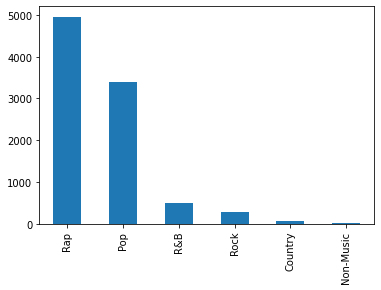

In [7]:
data['genre'].value_counts().plot.bar()

In [8]:
# Show average values of different genres
data.groupby('genre').mean()

rank        streams  danceability    energy       key  \
genre                                                                  
Country    6.509091  558525.690909      0.616455  0.624291  3.927273   
Non-Music  8.500000   52651.062500      0.675687  0.590194  4.375000   
Pop        5.973420  172066.515357      0.665383  0.644842  5.346722   
R&B        6.199588  279928.462963      0.667167  0.581612  5.014403   
Rap        6.344015  229397.210601      0.743791  0.646882  5.318622   
Rock       7.088561  184411.929889      0.564605  0.696542  5.346863   

           loudness  speechiness  acousticness  instrumentalness  liveness  \
genre                                                                        
Country   -6.165818     0.047007      0.338672          0.000227  0.182062   
Non-Music -7.691250     0.166212      0.348913          0.013736  0.272744   
Pop       -6.309671     0.088835      0.267259          0.011250  0.172104   
R&B       -7.084679     0.119731      0.304387          0.010394  0.159428   
Rap       -6.951250     0.200828      0.235030          0.006020  0.166448   
Rock      -6.148196     0.065221      0.150808          0.027115  0.191839   

            valence       tempo    duration_ms  
genre                                           
Country    0.528036  118.997909  214030.400000  
Non-Music  0.440500  125.413875  198262.687500  
Pop        0.527481  121.590847  208395.932369  
R&B        0.460988  119.223866  208715.207819  
Rap        0.498846  122.288106  191702.317211  
Rock       0.468004  124.315421  234032.896679

In [9]:
data.corr()

rank   streams  danceability    energy       key  \
rank              1.000000 -0.071733     -0.039571 -0.008240 -0.003710   
streams          -0.071733  1.000000      0.013244 -0.054185 -0.006170   
danceability     -0.039571  0.013244      1.000000  0.098647  0.007529   
energy           -0.008240 -0.054185      0.098647  1.000000  0.029266   
key              -0.003710 -0.006170      0.007529  0.029266  1.000000   
loudness         -0.041149  0.008528      0.077020  0.690027 -0.006678   
speechiness       0.026157  0.049612      0.150154  0.009008  0.029575   
acousticness      0.023173 -0.008479     -0.202518 -0.436093  0.012737   
instrumentalness  0.026211 -0.007509     -0.027530 -0.035510  0.003692   
liveness          0.019740  0.010141     -0.084828  0.124784 -0.001379   
valence          -0.021164 -0.070182      0.334702  0.356057  0.045157   
tempo            -0.013829  0.003257     -0.074984  0.057210  0.007823   
duration_ms      -0.034387 -0.034188     -0.217149 -0.050643 -0.019867   

                  loudness  speechiness  acousticness  instrumentalness  \
rank             -0.041149     0.026157      0.023173          0.026211   
streams           0.008528     0.049612     -0.008479         -0.007509   
danceability      0.077020     0.150154     -0.202518         -0.027530   
energy            0.690027     0.009008     -0.436093         -0.035510   
key              -0.006678     0.029575      0.012737          0.003692   
loudness          1.000000    -0.128264     -0.334114         -0.112977   
speechiness      -0.128264     1.000000     -0.017547         -0.067156   
acousticness     -0.334114    -0.017547      1.000000          0.003596   
instrumentalness -0.112977    -0.067156      0.003596          1.000000   
liveness          0.056855     0.039975     -0.051975         -0.021590   
valence           0.259502     0.045120     -0.104248         -0.058337   
tempo             0.037314     0.047505     -0.057033         -0.008918   
duration_ms      -0.052682    -0.132727      0.067066          0.041880   

                  liveness   valence     tempo  duration_ms  
rank              0.019740 -0.021164 -0.013829    -0.034387  
streams           0.010141 -0.070182  0.003257    -0.034188  
danceability     -0.084828  0.334702 -0.074984    -0.217149  
energy            0.124784  0.356057  0.057210    -0.050643  
key              -0.001379  0.045157  0.007823    -0.019867  
loudness          0.056855  0.259502  0.037314    -0.052682  
speechiness       0.039975  0.045120  0.047505    -0.132727  
acousticness     -0.051975 -0.104248 -0.057033     0.067066  
instrumentalness -0.021590 -0.058337 -0.008918     0.041880  
liveness          1.000000  0.046480 -0.001990    -0.000962  
valence           0.046480  1.000000  0.046247    -0.138440  
tempo            -0.001990  0.046247  1.000000    -0.008525  
duration_ms      -0.000962 -0.138440 -0.008525     1.000000

rank                    AxesSubplot(0.125,0.71587;0.168478x0.16413)
streams              AxesSubplot(0.327174,0.71587;0.168478x0.16413)
danceability         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
energy               AxesSubplot(0.731522,0.71587;0.168478x0.16413)
key                    AxesSubplot(0.125,0.518913;0.168478x0.16413)
loudness            AxesSubplot(0.327174,0.518913;0.168478x0.16413)
speechiness         AxesSubplot(0.529348,0.518913;0.168478x0.16413)
acousticness        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
instrumentalness       AxesSubplot(0.125,0.321957;0.168478x0.16413)
liveness            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
valence             AxesSubplot(0.529348,0.321957;0.168478x0.16413)
tempo               AxesSubplot(0.731522,0.321957;0.168478x0.16413)
duration_ms               AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

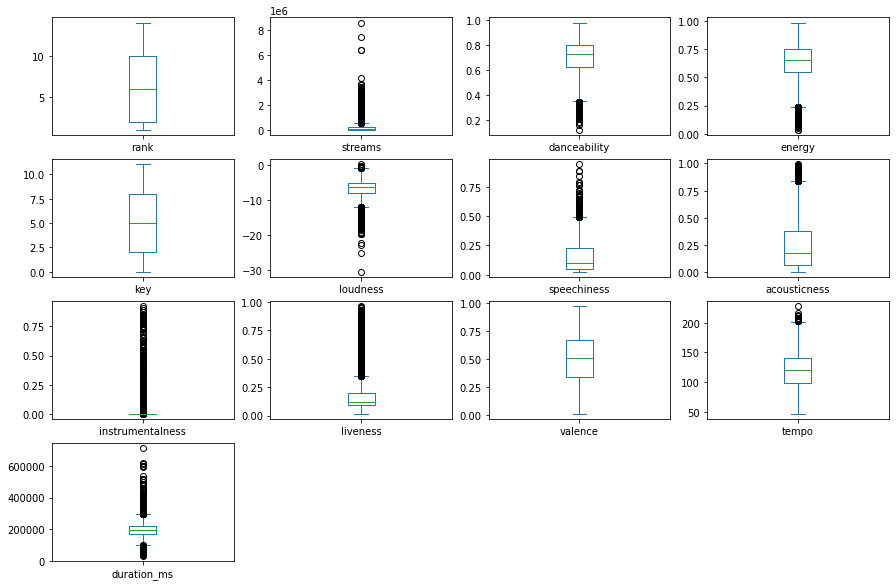

In [10]:
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 10))

array([[<AxesSubplot:title={'center':'rank'}>,
        <AxesSubplot:title={'center':'streams'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_ms'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

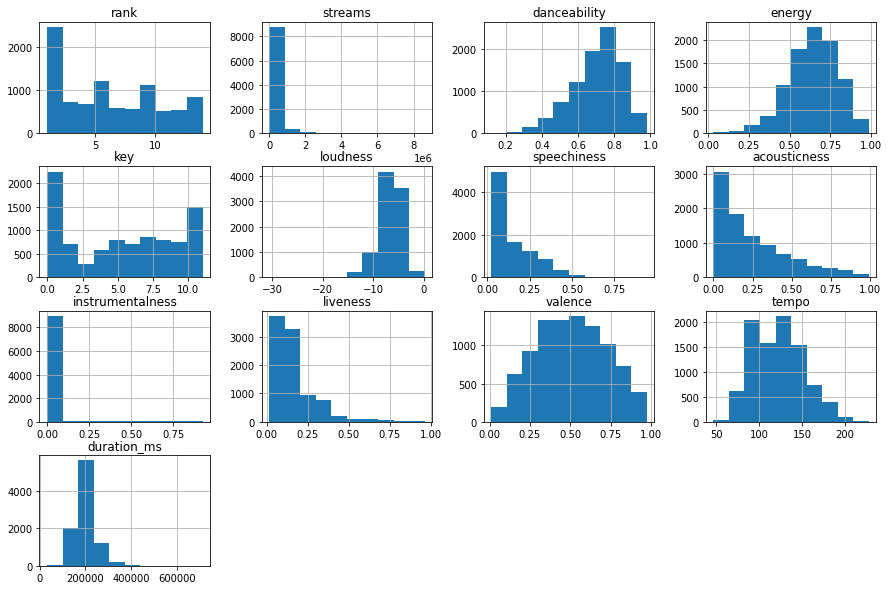

In [11]:
data.hist(figsize=(15,10))

### Training a model

In [12]:
# Drop unmeasurable columns with strings.
data.drop('title', inplace=True, axis=1)
data.drop('date', inplace=True, axis=1)
data.drop('artist', inplace=True, axis=1)
data.drop('url', inplace=True, axis=1)
data.drop('region', inplace=True, axis=1)

In [13]:
# Second round - dropping streams and duration_ms
data.drop('streams', inplace=True, axis=1)
data.drop('duration_ms', inplace=True, axis=1)

In [14]:
# Check that they have been removed properly.
data

rank  danceability  energy  key  loudness  speechiness  acousticness  \
0        1         0.852   0.773  8.0    -2.921       0.0776       0.18700   
1        1         0.660   0.786  2.0    -4.757       0.1700       0.20900   
2        1         0.642   0.374  5.0   -10.606       0.0320       0.42300   
3        1         0.778   0.317  1.0   -10.732       0.3340       0.59200   
4        1         0.825   0.652  1.0    -3.183       0.0802       0.58100   
...    ...           ...     ...  ...       ...          ...           ...   
9171    14         0.729   0.632  1.0    -6.572       0.0320       0.00196   
9172    14         0.881   0.797  9.0    -5.466       0.2640       0.18600   
9173    14         0.789   0.670  8.0    -8.229       0.4290       0.50100   
9174    14         0.739   0.470  0.0    -7.555       0.0269       0.58400   
9175    14         0.853   0.785  5.0    -5.943       0.2640       0.06600   

      instrumentalness  liveness  valence    tempo genre  
0             0.000030    0.1590   0.9070  102.034   Pop  
1             0.000000    0.1120   0.8460  177.833   Pop  
2             0.000002    0.4350   0.0979  129.863   Pop  
3             0.000000    0.0881   0.3270  140.048   Rap  
4             0.000000    0.0931   0.9310   95.977   R&B  
...                ...       ...      ...      ...   ...  
9171          0.000003    0.0848   0.7020  135.027   Pop  
9172          0.000000    0.1040   0.7730  139.879   Rap  
9173          0.000000    0.0785   0.4070   90.328   Rap  
9174          0.000000    0.1530   0.6030   88.017   Pop  
9175          0.000000    0.0445   0.8020  101.027   Rap  

[9176 rows x 12 columns]

In [15]:
# Convert the dataset into two arrays
array = data.values
# Create two (sub) arrays from it
X = array[:,0:11] # data without class
y = array[:,11]   # just class

In [16]:
# Check that y has the genre values.
y

array(['Pop', 'Pop', 'Pop', ..., 'Rap', 'Pop', 'Rap'], dtype=object)

In [17]:
from sklearn import model_selection

# Split the dataset into two: 
#   80% of it as training data
#   20% as a validation dataset
# Let Python split the set into four, we tell the proportion of splitting
test_set_size = 0.2

# Initial value for randomization
seed = 7

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_set_size, random_state=seed)


## Train different models to find out which one is most precise.

### <span style="color: green">GaussianNB</span>

In [19]:
import time
from sklearn.naive_bayes import GaussianNB

# Time the event.
tic = time.perf_counter()

# Choose a model for fitting the data.
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 0.044457 seconds


In [20]:
# Check how good the fit of the model is on the train data.
train_accuracy = gaussian_model.score(X_train, y_train)
train_accuracy

0.500408719346049

In [21]:
# Check how good the fit of the model is on the test data.
test_accuracy = gaussian_model.score(X_test, y_test)
test_accuracy

0.5136165577342048

In [22]:
# Test on the test data, try prediction
gaussian_prediction = gaussian_model.predict(X_test)
gaussian_prediction

array(['Country', 'Rap', 'Pop', ..., 'Rap', 'Pop', 'Rap'], dtype='<U9')

In [23]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, gaussian_prediction))

[[ 12   0   1   0   0   0]
 [  1   0   1   0   0   0]
 [287  13 139   1 232  10]
 [ 25   5  18   1  51   1]
 [112  21  58   2 787   6]
 [ 23   2  12   0  11   4]]


In [24]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")


Completed the fit in 44.4568 milliseconds
The fit has a train set accuracy of 50.0 %
The fit has a test set accuracy of 51.4 %


### <span style="color: green">Logistic Regression</span>

In [25]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

Completed the fit in 9.051099 seconds


C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Check how good the fit of the model is on the train data.
train_accuracy = logistic_regression_model.score(X_train, y_train)
train_accuracy

0.6952316076294278

In [27]:
# Check how good the fit of the model is on the test data.
test_accuracy = logistic_regression_model.score(X_test, y_test)
test_accuracy

0.7096949891067538

In [28]:
# Test on the test data, try prediction
logistic_regression_prediction = logistic_regression_model.predict(X_test)
logistic_regression_prediction

array(['Pop', 'Rap', 'Pop', ..., 'Rap', 'Rap', 'Rap'], dtype=object)

In [29]:
# Show distribution of genres.
data['genre'].value_counts()

Rap          4962
Pop          3386
R&B           486
Rock          271
Country        55
Non-Music      16
Name: genre, dtype: int64

In [30]:
# Confusion matrix provides an indication of the the errors of prediction
print(confusion_matrix(y_test, logistic_regression_prediction))

[[  0   0  13   0   0   0]
 [  0   0   1   0   1   0]
 [  0   0 473   0 209   0]
 [  0   0  49   0  52   0]
 [  0   0 156   0 830   0]
 [  0   0  45   0   7   0]]


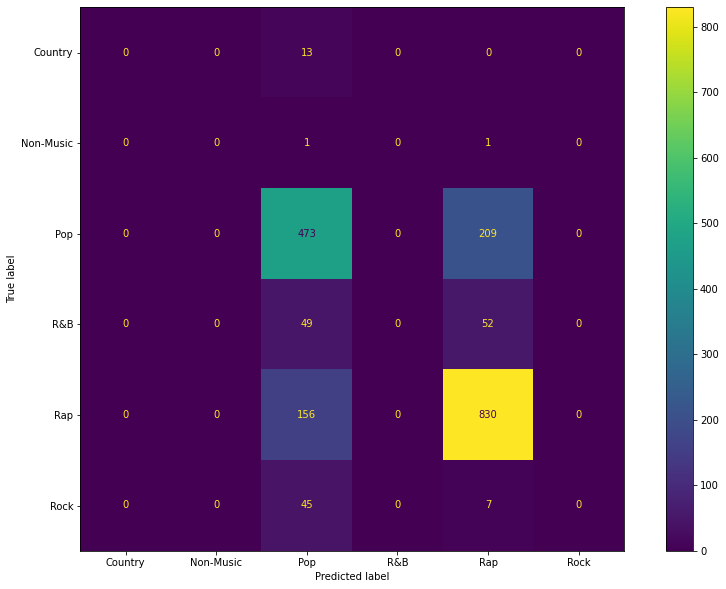

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, logistic_regression_prediction, labels=logistic_regression_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression_model.classes_)
disp.plot()
plt.rcParams["figure.figsize"] = (15,10)

In [39]:
print(f"Completed the fit in {round((toc-tic), 3)} seconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")


Completed the fit in 9.051 seconds
The fit has a train set accuracy of 69.5 %
The fit has a test set accuracy of 71.0 %


## Applying dimensionality reduction (PCA)

#### Reducing to 5 dimensions.

In [40]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [41]:
pca = PCA(n_components=5)
new_columns = ['1', '2', '3', '4', '5']
components = pca.fit_transform(X)
df_5 = pd.DataFrame(data = components, columns = new_columns)
array_5 = df_5.values
finalDf_5 = pd.concat([df_5, data[['genre']]], axis = 1)

In [42]:
X_train_5, X_test_5, y_train_5, y_test_5 = model_selection.train_test_split(
    array_10, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

NameError: name 'array_10' is not defined

In [ ]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = LogisticRegression(max_iter=1000)
logistic_regression_model_2.fit(X_train_5, y_train_5)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

In [ ]:
train_accuracy = logistic_regression_model_2.score(X_train_5, y_train_5)
train_accuracy

In [ ]:
test_accuracy = logistic_regression_model_2.score(X_test_5, y_test_5)
test_accuracy

In [ ]:
print(f"Completed the fit in {round((toc-tic), 6)} seconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

#### Reducing to 2 dimensions.

In [ ]:
pca = PCA(n_components=2)
new_columns = ['Principal Component 1', 'Principal Component 2']
components = pca.fit_transform(X)
df_2 = pd.DataFrame(data = components, columns = new_columns)
array_2 = df_2.values
finalDf_2 = pd.concat([df_2, data[['genre']]], axis = 1)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = model_selection.train_test_split(
    array_2, 
    y, 
    test_size = test_set_size, 
    random_state = seed
)

In [ ]:
# Time the event.
tic = time.perf_counter()

logistic_regression_model_2 = LogisticRegression(max_iter=1000)
logistic_regression_model_2.fit(X_train_2, y_train_2)

toc = time.perf_counter()
print(f"Completed the fit in {toc - tic:0.6f} seconds")

In [ ]:
train_accuracy = logistic_regression_model_2.score(X_train_2, y_train_2)
train_accuracy

In [ ]:
test_accuracy = logistic_regression_model_2.score(X_test_2, y_test_2)
test_accuracy

In [ ]:
print(f"Completed the fit in {round((toc-tic)*1000, 6)} milliseconds")
print(f"The fit has a \033[1m\033[93mtrain\033[0m set accuracy of {round(train_accuracy*100, 1)} %")
print(f"The fit has a \033[1m\033[92mtest\033[0m set accuracy of {round(test_accuracy*100, 1)} %")

### Visualize the new reduced dataset as a 2D diagram.


In [ ]:
# Show distribution of genres.
data['genre'].value_counts()

In [ ]:
finalDf_2 = pd.concat([df_2, data[['genre']]], axis = 1)

In [ ]:
finalDf_2

In [ ]:
# Visualize the new reduced dataset as a 2D diagram.

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Rap', 'Pop', 'R&B', 'Rock', 'Country', 'Non-Music']
colors = ['g', 'r', 'b', 'y', 'm', 'c']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_2['genre'] == target
    ax.scatter(finalDf_2.loc[indicesToKeep, 'Principal Component 1']
               , finalDf_2.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()